In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("analysis.xlsx",index_col = "Hours")
df

,Demand (MW),Wind generation (MW)
Hours,,
1,5151.0,3360.0
2,5046.0,3351.0
3,4933.5,3334.5
4,4785.0,3280.5
5,4722.0,3342.0
...,...,...
2846,7648.5,2797.5
2847,7695.0,2683.5
2848,7722.0,2494.5


In [3]:
df.columns

Index(['Demand (MW)', 'Wind generation (MW)'], dtype='object')

In [4]:
df= df[  [df.columns[0] , df.columns[1] ]   ] 

df

,Demand (MW),Wind generation (MW)
Hours,,
1,5151.0,3360.0
2,5046.0,3351.0
3,4933.5,3334.5
4,4785.0,3280.5
5,4722.0,3342.0
...,...,...
2846,7648.5,2797.5
2847,7695.0,2683.5
2848,7722.0,2494.5


Text(0.5, 1.0, 'Hourly system demand and wind generation')

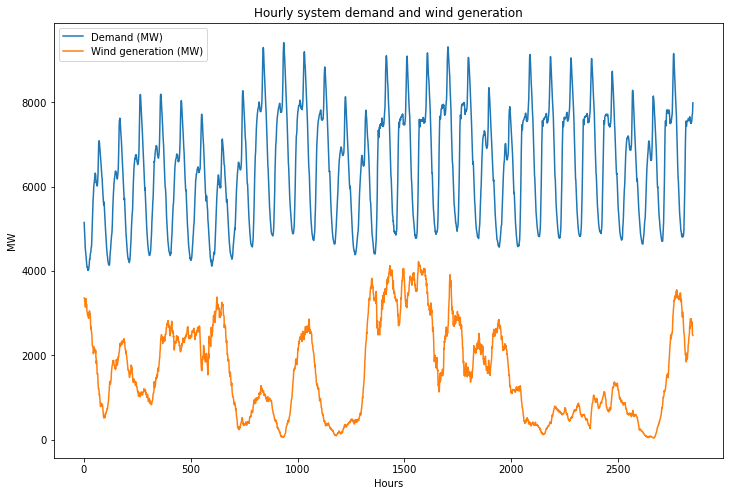

In [7]:
df.plot(figsize=(12,8))

plt.ylabel("MW")
plt.title("Hourly system demand and wind generation")

In [8]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', name='Hours', length=2850)

In [13]:
df["Net load (MW)"]= ""
df

,Demand (MW),Wind generation (MW),Net load (MW)
Hours,,,
1,5151.0,3360.0,
2,5046.0,3351.0,
3,4933.5,3334.5,
4,4785.0,3280.5,
5,4722.0,3342.0,
...,...,...,...
2846,7648.5,2797.5,
2847,7695.0,2683.5,
2848,7722.0,2494.5,


In [14]:
for k in df.index:
    
    if df.loc[k, "Wind generation (MW)"] > df.loc[k, "Demand (MW)"]:
        df.loc[k, "Net load (MW)"] = 0
    else:
        df.loc[k, "Net load (MW)"] = df.loc[k, "Demand (MW)"] - df.loc[k, "Wind generation (MW)"]
        

In [15]:
df

,Demand (MW),Wind generation (MW),Net load (MW)
Hours,,,
1,5151.0,3360.0,1791
2,5046.0,3351.0,1695
3,4933.5,3334.5,1599
4,4785.0,3280.5,1504.5
5,4722.0,3342.0,1380
...,...,...,...
2846,7648.5,2797.5,4851
2847,7695.0,2683.5,5011.5
2848,7722.0,2494.5,5227.5


In [16]:
df["Net load (MW)"].min()

957.0

In [27]:
df["Net load (MW)"].max()

9337.5

Text(0.5, 1.0, 'Net load')

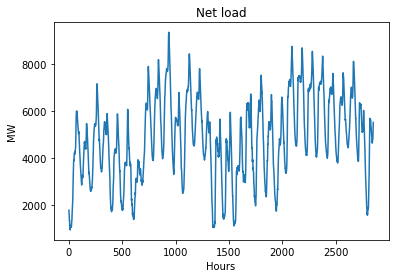

In [17]:
df["Net load (MW)"].plot()
plt.ylabel("MW")
plt.title("Net load")

Text(0.5, 1.0, 'Net load')

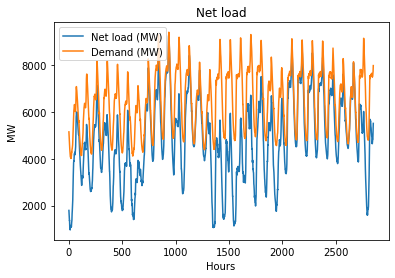

In [18]:
df[ ["Net load (MW)",  "Demand (MW)" ] ].plot()
plt.ylabel("MW")
plt.title("Net load")

In [19]:
check = df["Net load (MW)"]> df["Demand (MW)"]
check

Hours
1       False
2       False
3       False
4       False
5       False
        ...  
2846    False
2847    False
2848    False
2849    False
2850    False
Length: 2850, dtype: bool

In [20]:
type(check)

pandas.core.series.Series

In [21]:
sum(check)

0

In [22]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', name='Hours', length=2850)

In [23]:
# Share of wind contribution to meeting demand
for k in df.index:
    if df.loc[k, "Wind generation (MW)"] > df.loc[k, "Demand (MW)"]:
        df.loc[k, "Wind share (%)"] = 100
        
    else:
        df.loc[k, "Wind share (%)"] = (df.loc[k, "Wind generation (MW)"]/df.loc[k, "Demand (MW)"])*100
        


In [24]:
df

,Demand (MW),Wind generation (MW),Net load (MW),Wind share (%)
Hours,,,,
1,5151.0,3360.0,1791,65.230052
2,5046.0,3351.0,1695,66.409037
3,4933.5,3334.5,1599,67.588933
4,4785.0,3280.5,1504.5,68.557994
5,4722.0,3342.0,1380,70.775095
...,...,...,...,...
2846,7648.5,2797.5,4851,36.575799
2847,7695.0,2683.5,5011.5,34.873294
2848,7722.0,2494.5,5227.5,32.303807


In [37]:
df["Wind share (%)"].min()

0.49953746530989823

In [31]:
df["Wind share (%)"].max()

77.86707882534776

Text(0.5, 1.0, 'Wind contribution to meet hourly demand (%)')

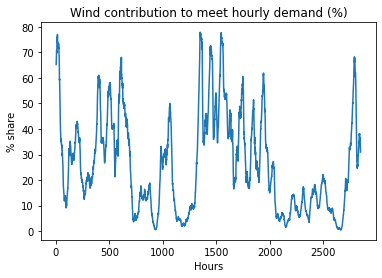

In [25]:
df[ "Wind share (%)"  ].plot()
plt.ylabel("% share")
plt.title("Wind contribution to meet hourly demand (%)")

Text(0.5, 1.0, 'Wind contribution to meet hourly demand (%)')

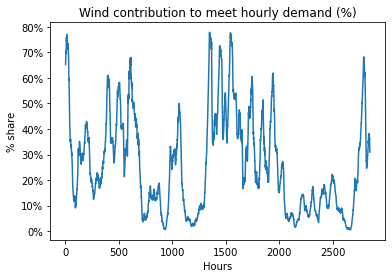

In [26]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax = df["Wind share (%)"].plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylabel("% share")
plt.title("Wind contribution to meet hourly demand (%)")